# Limpieza de datos y análisis de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/TareaMineria/AnalisisExploratorio/NetflixOriginals.csv"
data = pd.read_csv(ruta, encoding='latin')

Mounted at /gdrive


In [7]:
print(data.shape)
data.head()

(584, 6)


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,08-05-19,58,2.5,English/Japanese
1,Dark Forces,thriller,"August 21, 2020",81,2.6,ESP
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       580 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    583 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


# Limpieza

In [9]:
# Eliminamos los datos que están vacios
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       579 non-null    object 
 1   Genre       579 non-null    object 
 2   Premiere    579 non-null    object 
 3   Runtime     579 non-null    int64  
 4   IMDB Score  579 non-null    float64
 5   Language    579 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.7+ KB


In [10]:
# Eliminamos las columnas irrelevantes
columnasPeliculas = ['Title', 'Genre', 'IMDB Score']

for columna in columnasPeliculas:
  print(f'Columna {columna}: {data[columna].nunique()} subniveles')

Columna Title: 579 subniveles
Columna Genre: 130 subniveles
Columna IMDB Score: 54 subniveles


In [12]:
data.describe()

,Runtime,IMDB Score
count,579.000000,579.000000
mean,93.497409,6.274784
std,27.846426,0.976765
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.400000
75%,107.500000,7.000000
max,209.000000,9.000000


In [13]:
# Eliminamos las columnas repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
# Duplicamos el set de datos
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (579, 6)
Tamaño del set después de eliminar las filas repetidas: (579, 6)


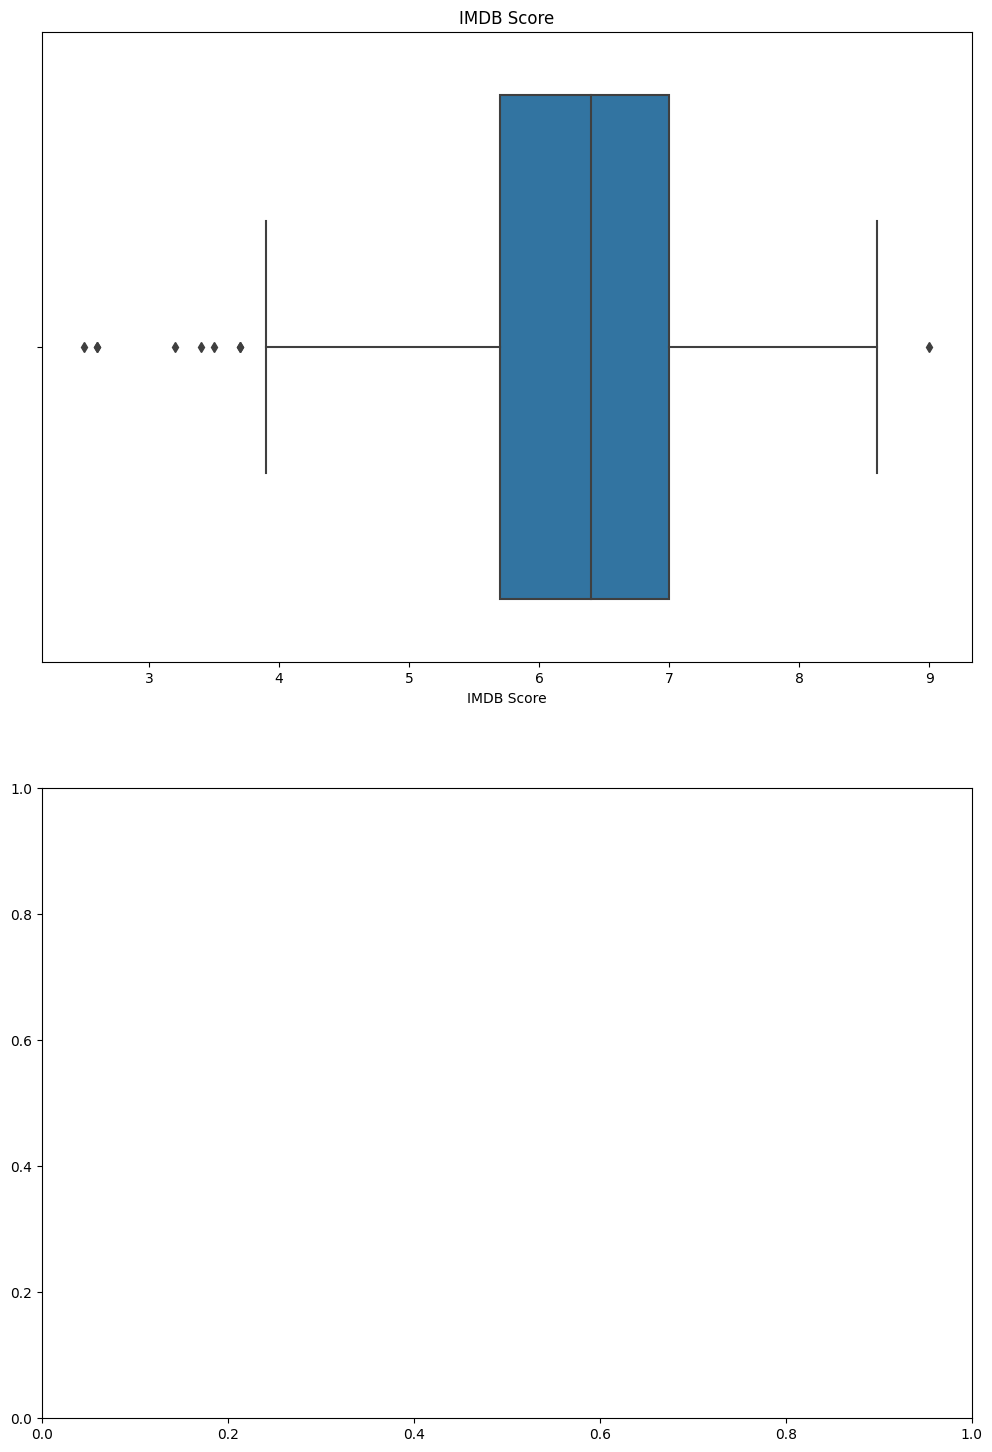

In [14]:
# GRAFICA BOXPLOT DE COLUMNAS NUMERICO
cols_num = ['IMDB Score']

# 10 ancho, 18 alto
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,18))

fig.subplots_adjust(hspace=0.2)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

Podemos deducir que en el "RUNTIME" hay muchas peliculas que duran menos de 100 minutos

Podemos deducir que en el "IMDB Score" hay valores menores a 6 de puntuacion

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


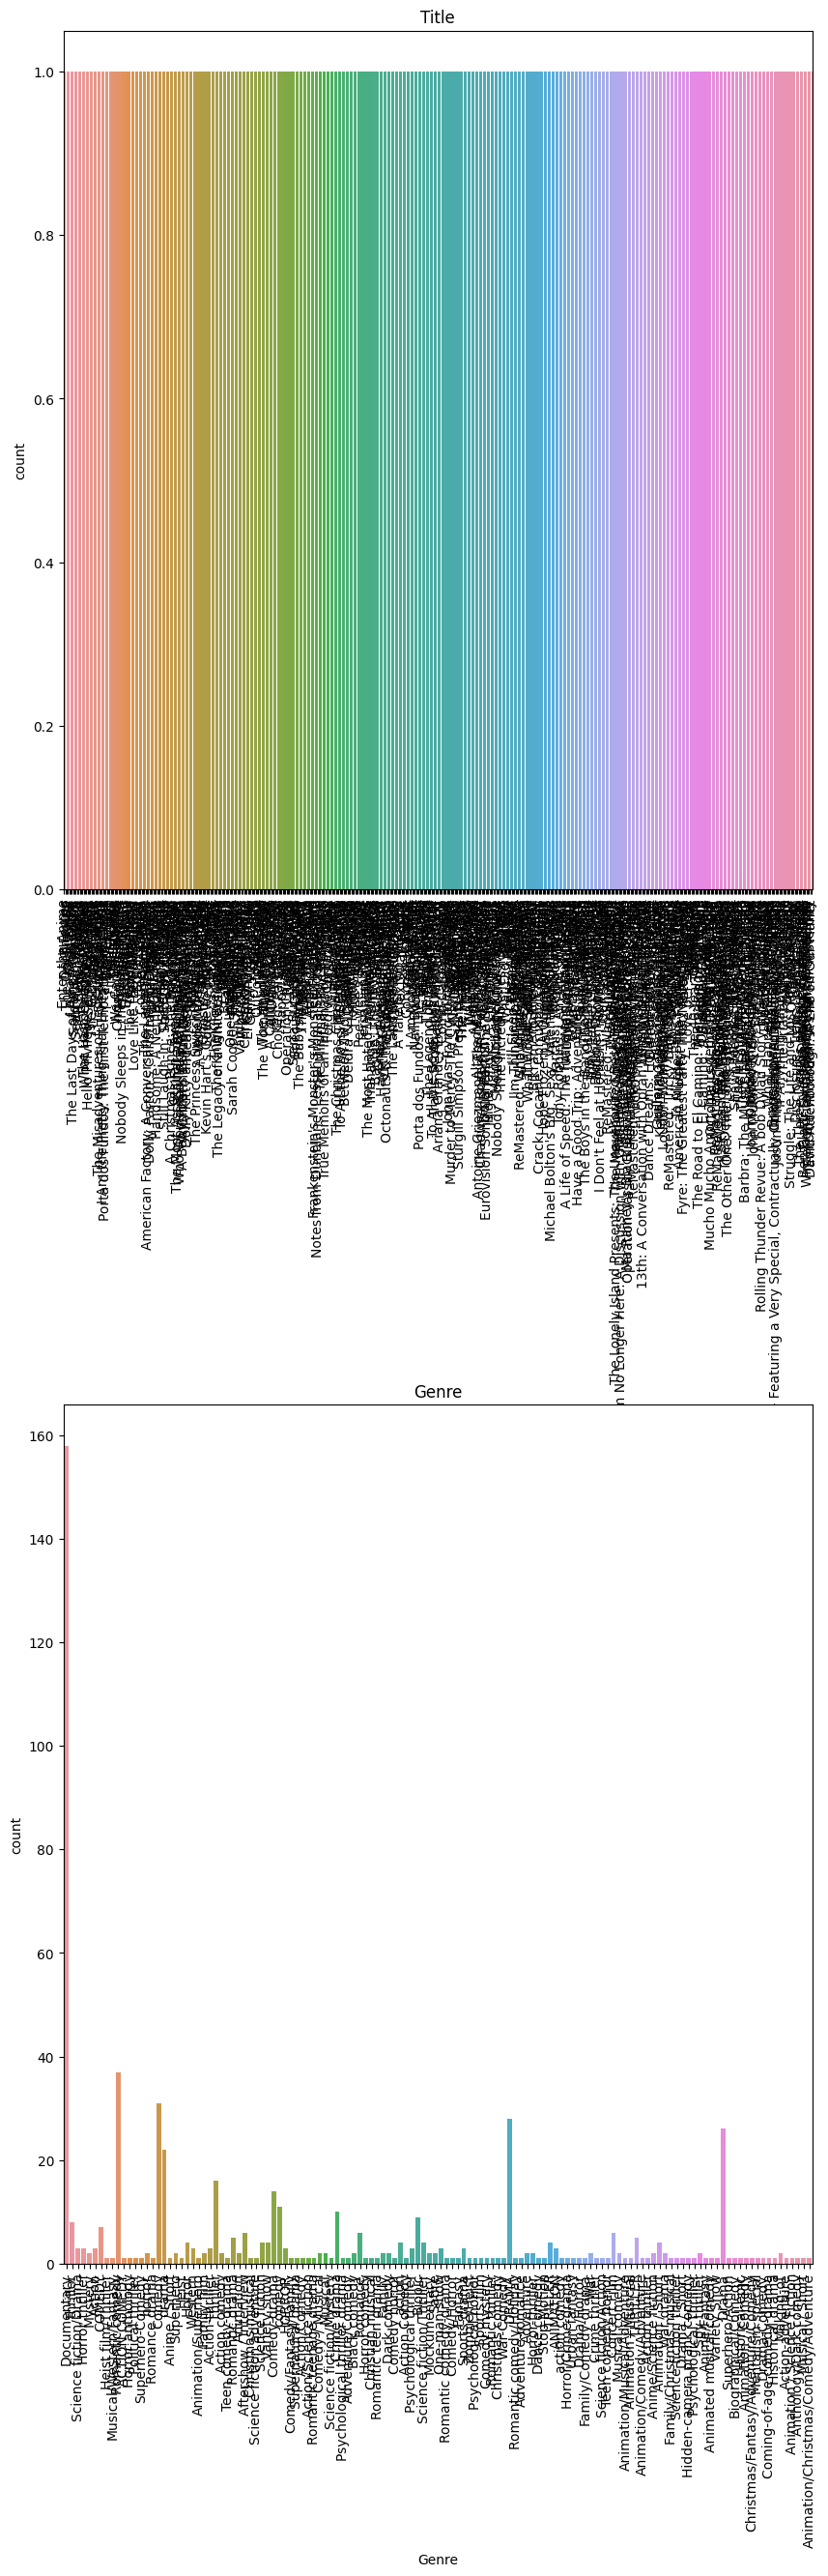

In [15]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['Title', 'Genre',]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=.6)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


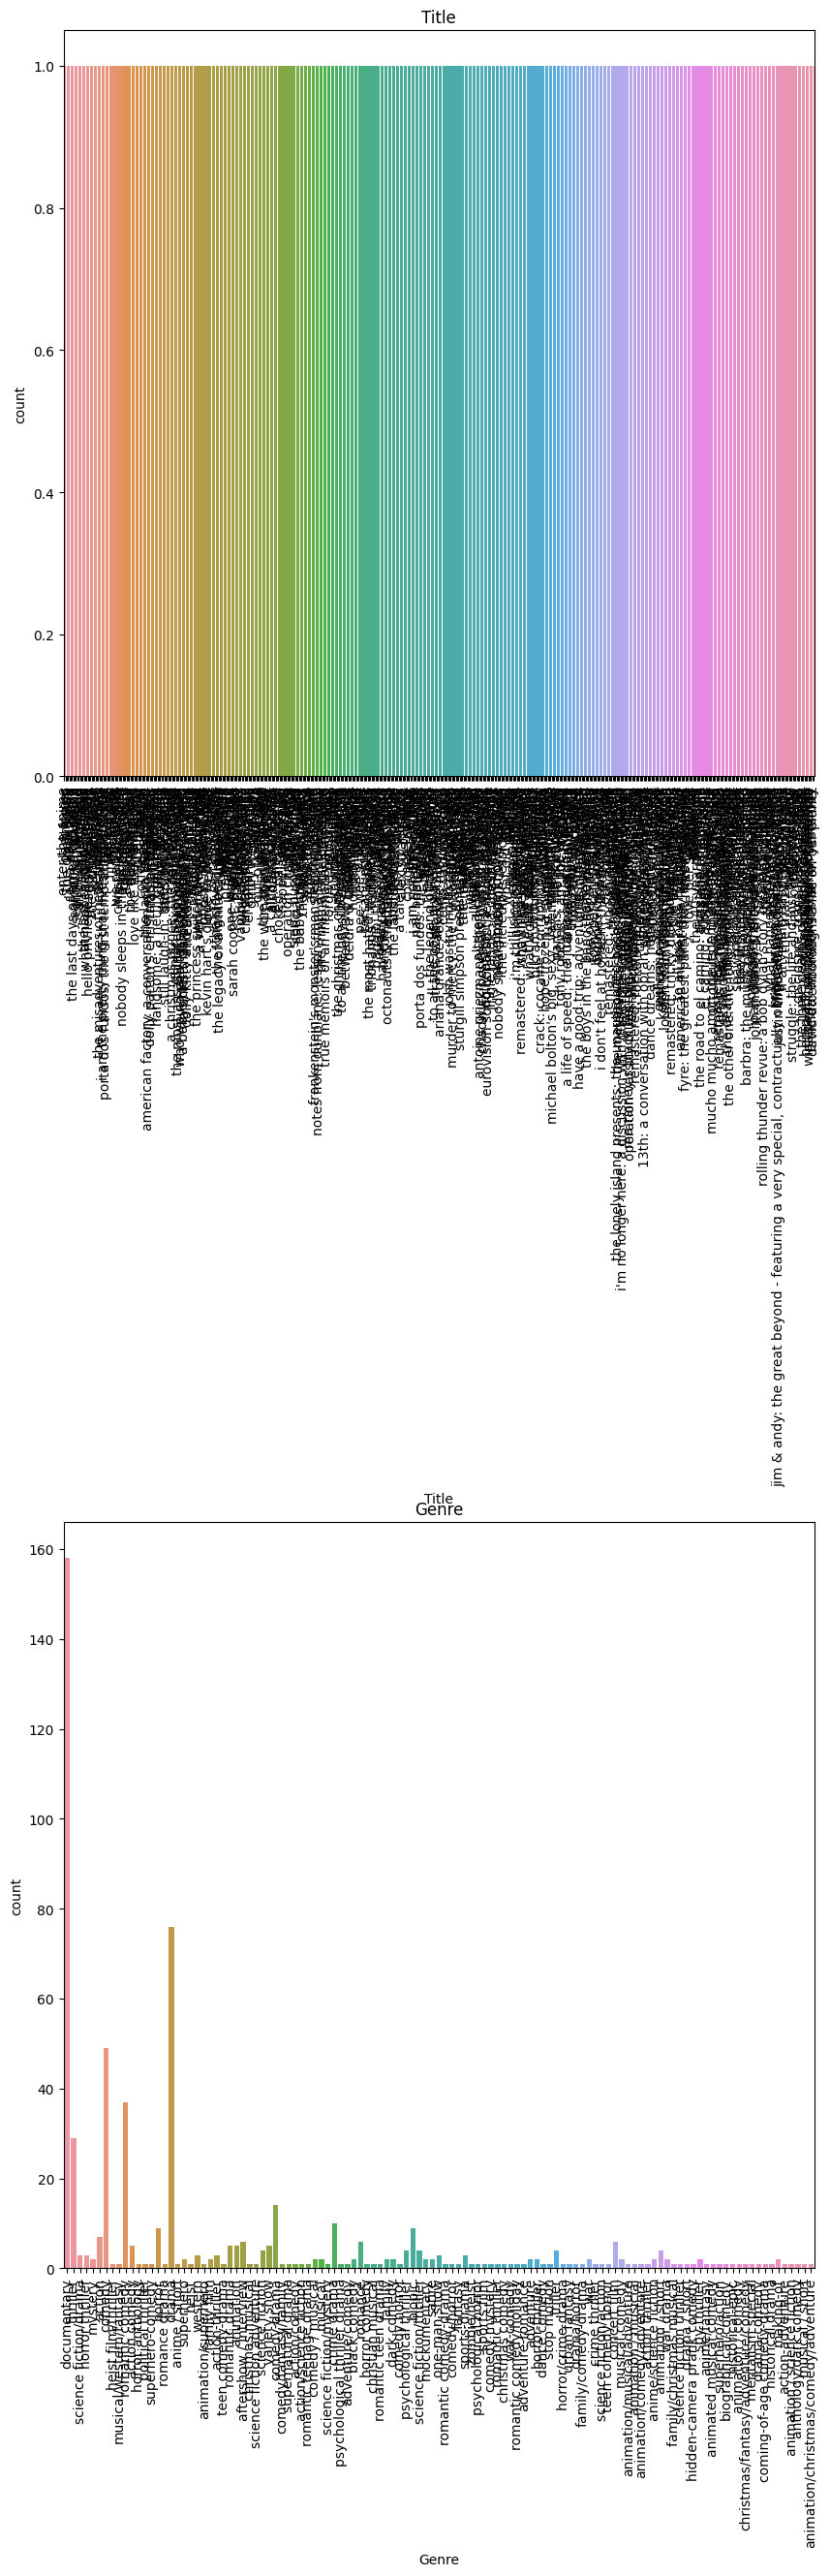

In [16]:
# Unificamos los niveles categoricos que tienen el mismo nombre
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

In [34]:
data[data['Genre'].str.contains('Comedy', case=False)]

,Title,Genre,Runtime,IMDB Score,Language,grupos_runtime
6,leyla everlasting,comedy,112,3.7,Turkish,>100
9,sardar ka grandson,comedy,139,4.1,Hindi,>100
12,whipped,romantic comedy,97,4.1,Indonesian,50 - 100
13,all because of you,action comedy,101,4.2,Malay,>100
18,what happened to mr. cha?,comedy,102,4.3,Korean,>100
...,...,...,...,...,...,...
489,seventeen,coming-of-age comedy-drama,99,7.2,spanish,50 - 100
492,the 40-year-old version,comedy,124,7.2,English,>100
518,the fundamentals of caring,comedy-drama,97,7.3,English,50 - 100
543,ludo,anthology/dark comedy,149,7.6,Hindi,>100


### Como notamos no hay nada que unificar

In [17]:
data.shape

(579, 6)

Se redujo en la limpieza de: 584 y 6 columnas a 579 filas y 6 columnas

# Análisis exploratorio

Ver cuales características de las películas que tienen mayor probabilidad a ser mejor puntuadas.

In [18]:
data['Genre'] = data['Genre'].str.replace('COMEDY', 'Comedy', regex=False)
data['Genre'] = data['Genre'].str.replace('Comedy', 'comedy', regex=False)
data['Genre'] = data['Genre'].str.replace('ACTION COMEDY', 'action comedy', regex=False)
print(data['Genre'].unique())

['documentary' 'thriller' 'science fiction/drama' 'horror thriller'
 'mystery' 'action' 'comedy' 'heist film/thriller'
 'musical/western/fantasy' 'romantic comedy' 'action comedy'
 'horror anthology' 'political thriller' 'superhero-comedy' 'horror'
 'romance drama' 'drama' 'anime / short' 'superhero' 'heist' 'western'
 'animation/superhero' 'family film' 'action-thriller' 'teen comedy-drama'
 'romantic drama' 'animation' 'aftershow / interview' 'christmas musical'
 'science fiction adventure' 'science fiction' 'variety show'
 'comedy-drama' 'comedy/fantasy/family' 'supernatural drama'
 'action/comedy' 'action/science fiction' 'romantic teenage drama'
 'comedy / musical' 'musical' 'science fiction/mystery' 'crime drama'
 'psychological thriller drama' 'adventure/comedy' 'black comedy'
 'romance' 'horror comedy' 'christian musical' 'romantic teen drama'
 'family' 'dark comedy' 'comedy horror' 'psychological thriller' 'biopic'
 'science fiction/thriller' 'mockumentary' 'satire' 'one-man s

In [19]:
# Análisis individual de variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       579 non-null    object 
 1   Genre       579 non-null    object 
 2   Premiere    579 non-null    object 
 3   Runtime     579 non-null    int64  
 4   IMDB Score  579 non-null    float64
 5   Language    579 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.7+ KB


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


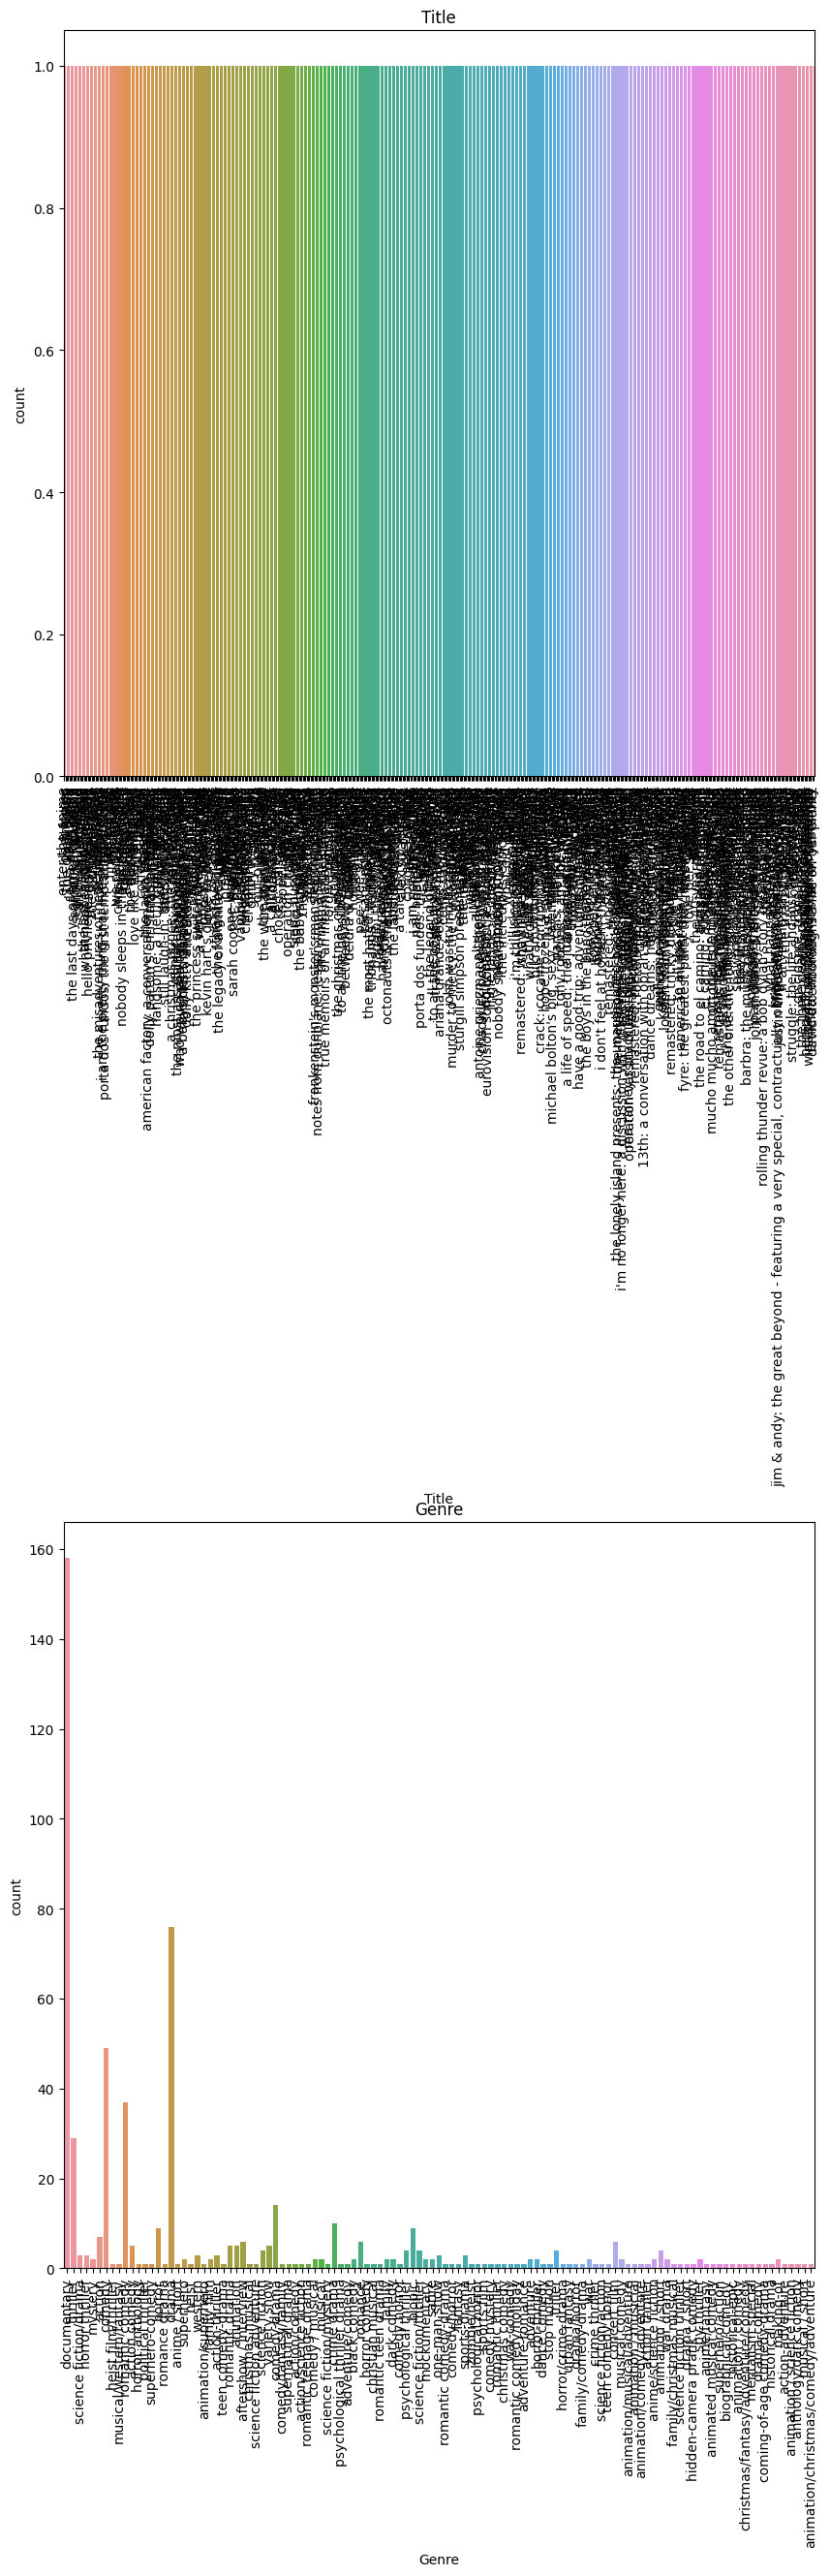

In [20]:
# Gráfica de las variables categoricas
for column in data.columns:

    if column in cols_cat:
        data[column] = data[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

In [22]:
# Eliminamos las columnas no deseadas
data.drop(columns=['Premiere'],inplace=True)
data.columns

Index(['Title', 'Genre', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [21]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
data['IMDB Score'].describe()

count    579.000000
mean       6.274784
std        0.976765
min        2.500000
25%        5.700000
50%        6.400000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

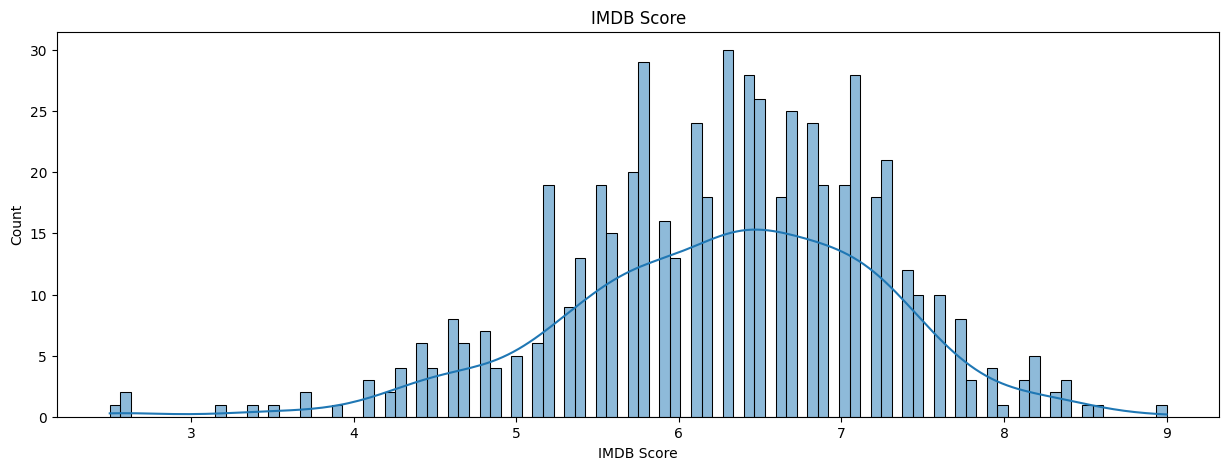

In [24]:
col_num = ['IMDB Score']

fig, ax = plt.subplots(nrows=1, ncols=len(col_num), figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

if len(col_num) == 1:
    ax = [ax]  # Convertir a lista si solo hay un elemento en col_num

for i, col in enumerate(col_num):
    nbins = 100  # Establecer nbins en 100 para ambos casos

    sns.histplot(x=data[col], ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

plt.show()

OBSERVACIONES:

Las mejores puntuaciones de peliculas con IMDB Score estan entre 5.0 y 7.0 (25% - 75%)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


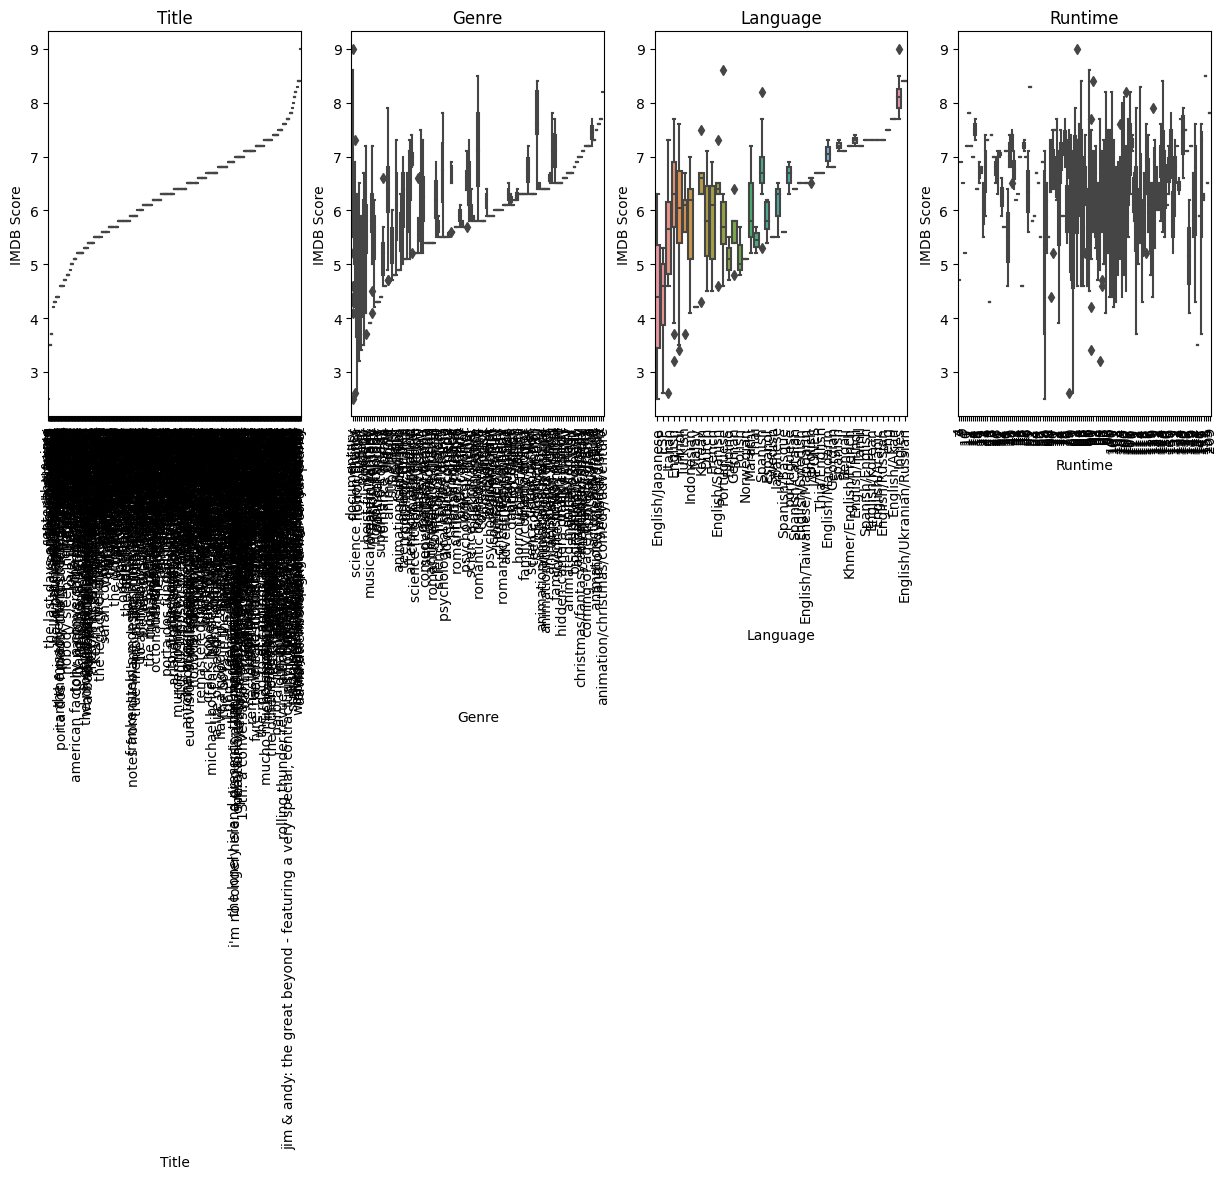

In [27]:
col_num = ['IMDB Score']
cols_cat = ['Title', 'Genre', 'Language', 'Runtime']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

for i, col in enumerate(cols_cat):
  bplt = sns.boxplot(x=col, y=col_num[0], data=data, ax=ax[i])

  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)


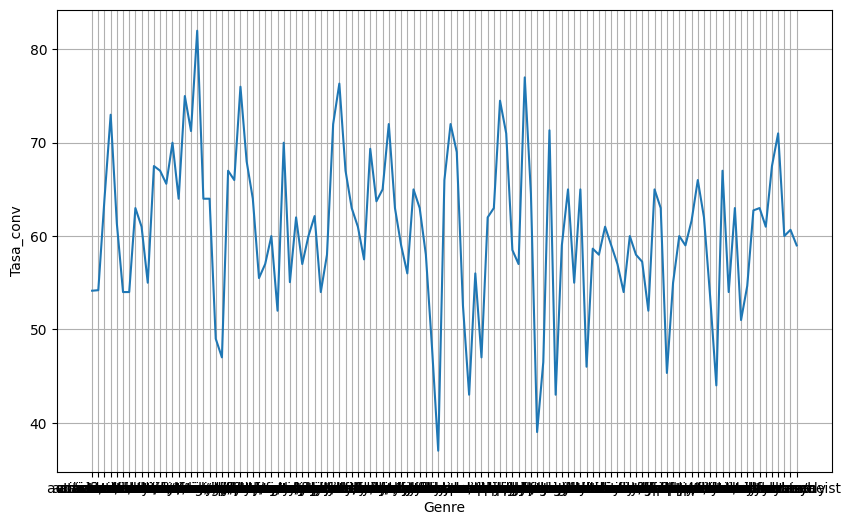

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


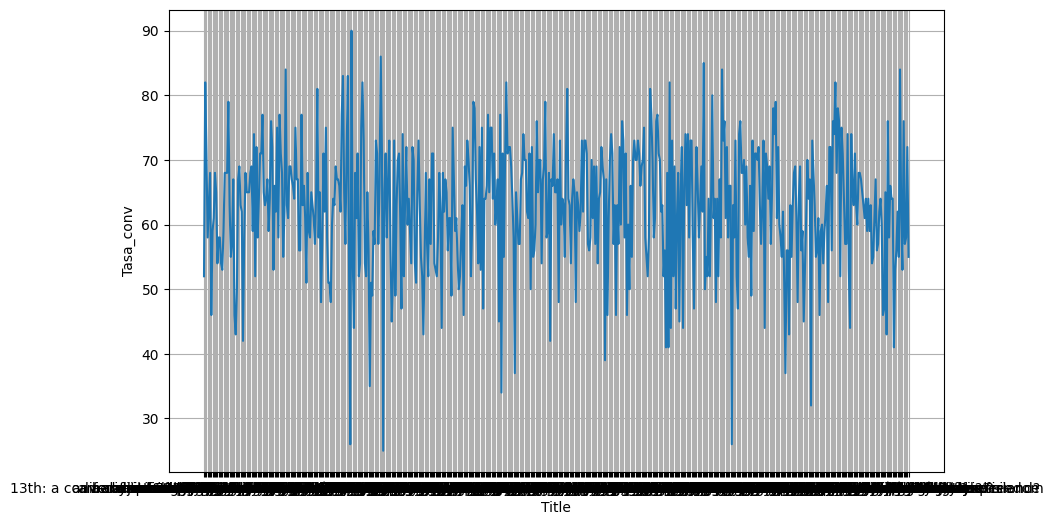

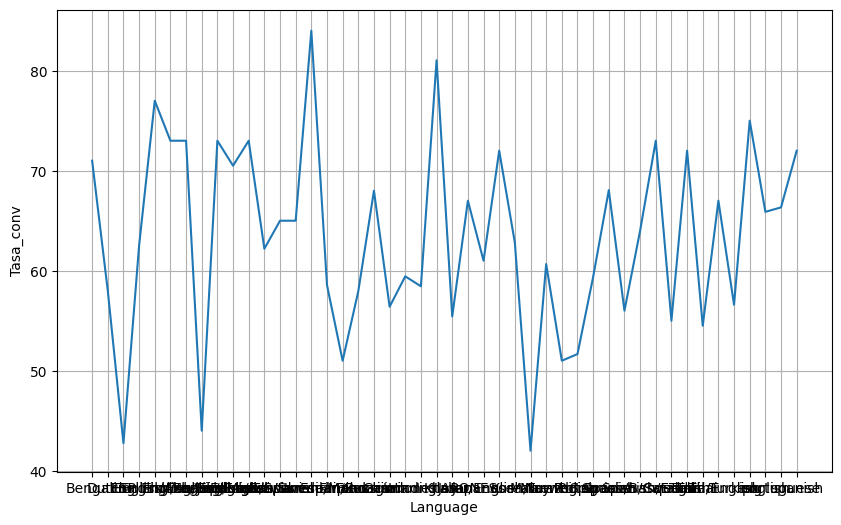

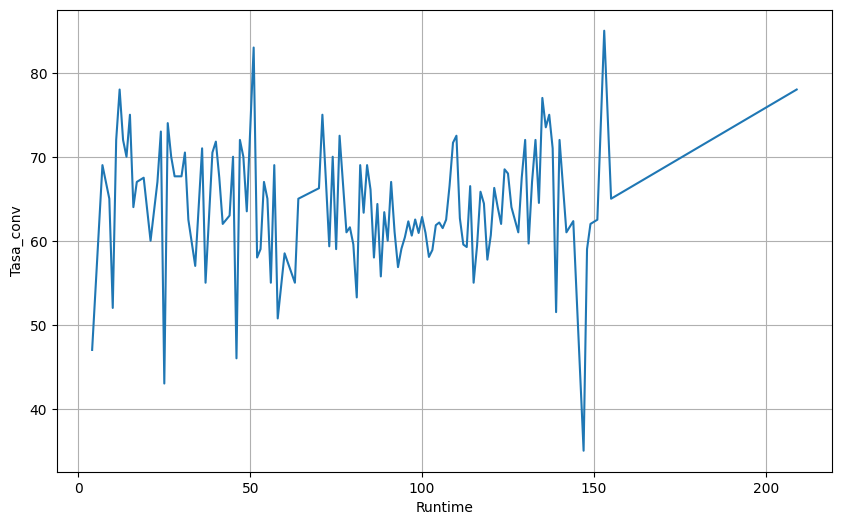

In [31]:
def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    grupo = data.groupby(x)[y].mean().mul(10).rename('Tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line':
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='Tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar':
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='Tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter':
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='Tasa_conv', data=grupo)
        plt.grid()


graficar_tasas_conversion('Genre', 'IMDB Score')
graficar_tasas_conversion('Title', 'IMDB Score')
graficar_tasas_conversion('Language', 'IMDB Score')
graficar_tasas_conversion('Runtime', 'IMDB Score')

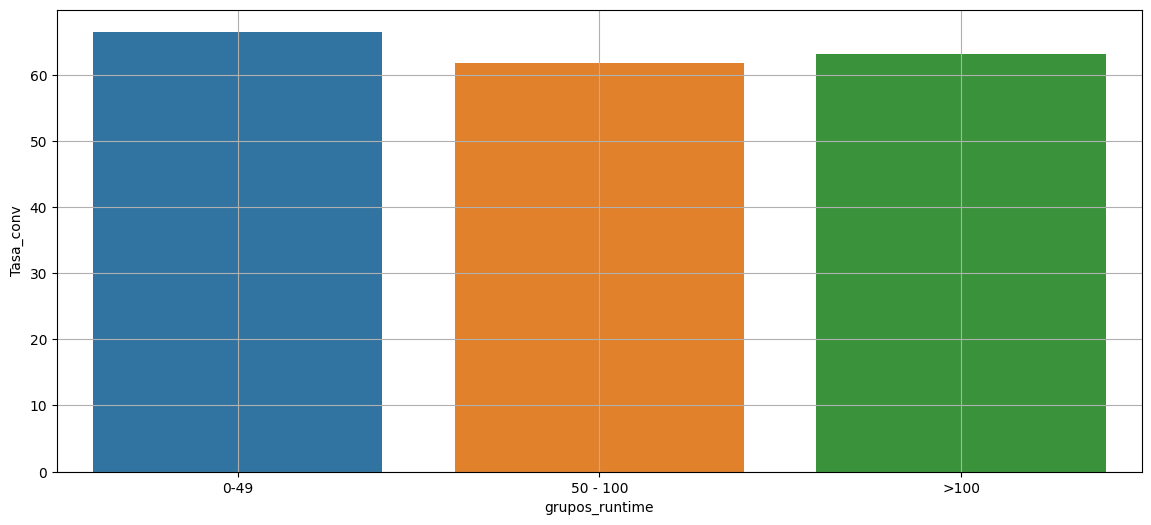

In [32]:
data.loc[(data['Runtime']>0)&(data['Runtime']<50), 'grupos_runtime'] = "0-49"
data.loc[(data['Runtime']>=50)&(data['Runtime']<=99), 'grupos_runtime'] = "50 - 100"
data.loc[data['Runtime']>100,'grupos_runtime'] = ">100"

graficar_tasas_conversion('grupos_runtime', 'IMDB Score',type='bar')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)


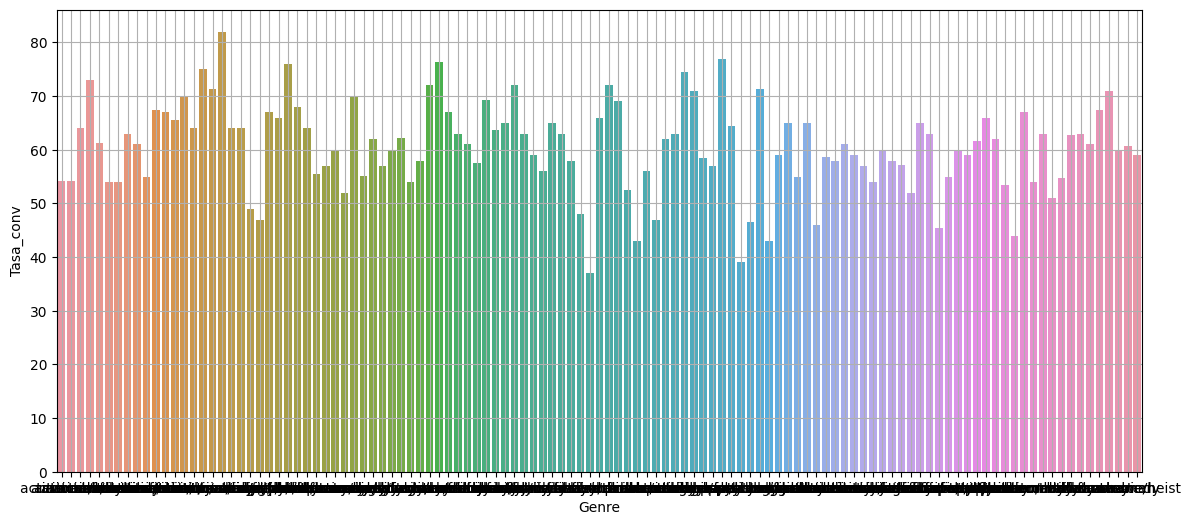

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


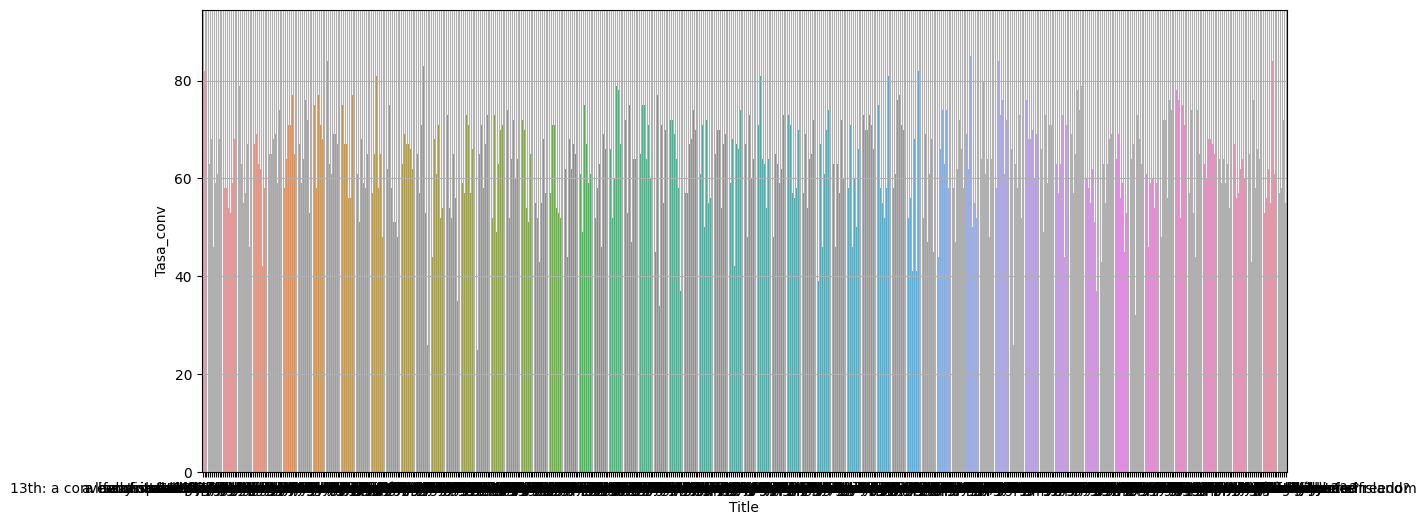

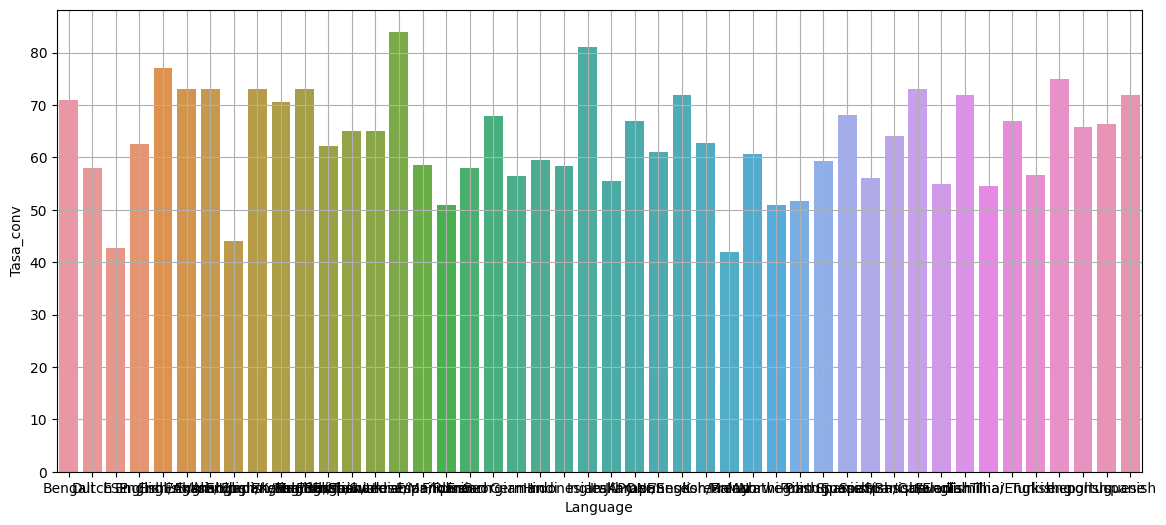

In [33]:
# Variables categoricas
graficar_tasas_conversion('Genre','IMDB Score',type='bar')
graficar_tasas_conversion('Title','IMDB Score',type='bar')
graficar_tasas_conversion('Language','IMDB Score',type='bar')

# Conclusión

* Ni en 'Genre', Language' y 'Title' se observan diferencias entre las características de las películas que tienen mayor probabilidad a ser mejor puntuadas.

* La variable "Genre" seguida de la variable "Language" son las que tienen mayor impacto como caracteriticas relevantes.

* Podemos obtener de resultado en base al analisis de las siguientes variables:

  1.   Lenguaje en relacion al IBDM Score
  2.   Runtime en relacion al IBDM Score
  3.   Genre en relacion al IBDM Score
  4.   Lenguaje en relacion al IBDM Score
